## Name of the assignment: Lead Scoring Case Study
## Date of submission: 08/March/2021
## Students: Marcelo Gonçalves Silva, Sunny Bhupati
## Institution: upGrad in collaboration with IIIT-B
## --------------------------------------------------------------------------

#### Problem statement

An education company named X Education sells online courses to industry professionals.
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

The company requires a model wherein a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#####  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Assignment approach

    1. Data inspection.
    2. Exploratory data analysis (EDA).
        2.1 Missing values (visualization).
        2.2 Missing values (treatment).
        2.3 Categorical variables.
        2.4 Numerical vriables.
    3. Create dummy variables.
    4. Model building.
        4.1 Importing required package and splitting into x and y.
        4.2 Scaling.
        4.3 Building logistic regression model.
        4.4 Making prediction in the training data.
        4.5 Model accuracy
        4.6 Plot the ROC curve and probability cutoffs.
        4.7 Model accuracy after cutoff.
    5. Precision and recall tradeoff.
    6. Making predictions on the test set.
        6.1 Model accuracy.
    7. Find the lead score.

In [422]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [423]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Data inspection

In [424]:
# Importing all datasets
leads = pd.read_csv("Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [425]:
# basics of the df
print('Basics of the df: \n')
print(leads.info())

Basics of the df: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit            

In [426]:
#size of df:
print('Size of df: \n')
print(leads.shape)

Size of df: 

(9240, 37)


In [427]:
# Numerical variables:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### 2. Exploratory data analysis (EDA).

####  2.1 Missing values (visualization).

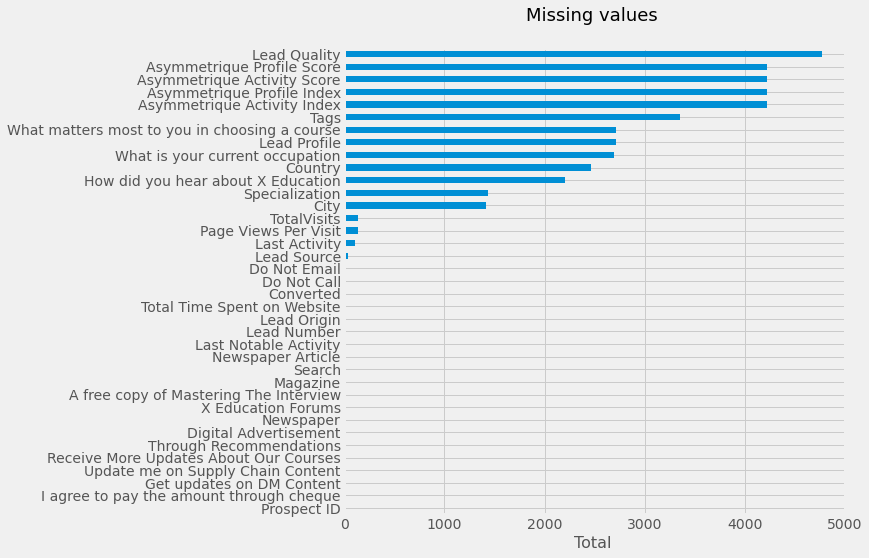

In [428]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (8, 8))
plt.title("Missing values \n", size = '18')
plt.xlabel("Total ", size = '16')
leads.isna().sum().sort_values(ascending = True).plot.barh()

In [429]:
#Checking the percentage of missing data

data_missing = leads.count() / len(leads)
data_missing = (1 - data_missing)*100

In [430]:
#Rounding off to 2 decimal places
data_missing  = round(data_missing, 2)

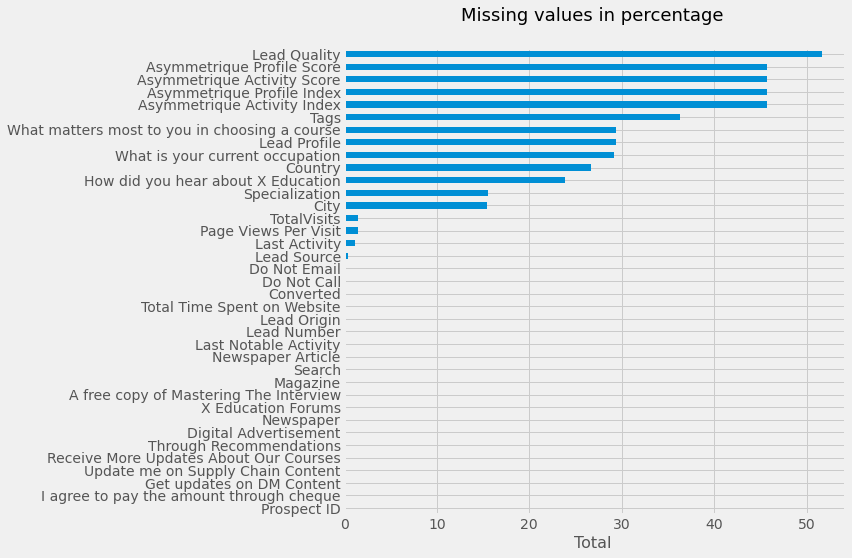

In [431]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (8, 8))
plt.title("Missing values in percentage \n", size = '18')
plt.xlabel("Total ", size = '16')
data_missing.sort_values(ascending = True).plot.barh()

####    2.2 Missing values (treatment).

##### Lead Quality:

In [432]:
leads['Lead Quality'].head()

0    Low in Relevance
1                 NaN
2            Might be
3            Not Sure
4            Might be
Name: Lead Quality, dtype: object

In [433]:
leads['Lead Quality'].isna().sum()

4767

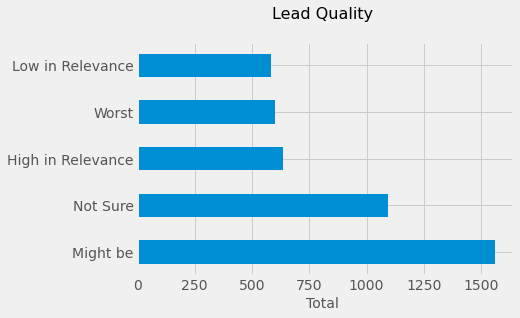

In [434]:
 
plt.title("Lead Quality \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Lead Quality'].value_counts().plot.barh()

In [435]:
# Replace missing values by "Not sure":
leads['Lead Quality'].fillna(value = 'Might be', inplace = True)
leads['Lead Quality'].isna().sum()

0

#####  Let's have a look at "Asymmetrique" columns:

        - Asymmetrique Profile Score;
        - Asymmetrique Activity Score;
        - Asymmetrique Profile Index;
        - Asymmetrique Activity Index

In [436]:
leads['Asymmetrique Profile Score'].head()

0    15.0
1    15.0
2    20.0
3    17.0
4    18.0
Name: Asymmetrique Profile Score, dtype: float64

In [437]:
leads['Asymmetrique Activity Score'].head()

0    15.0
1    15.0
2    14.0
3    13.0
4    15.0
Name: Asymmetrique Activity Score, dtype: float64

In [438]:
leads['Asymmetrique Profile Index'].head()

0    02.Medium
1    02.Medium
2      01.High
3      01.High
4      01.High
Name: Asymmetrique Profile Index, dtype: object

In [439]:
leads['Asymmetrique Activity Index'].head()

0    02.Medium
1    02.Medium
2    02.Medium
3    02.Medium
4    02.Medium
Name: Asymmetrique Activity Index, dtype: object

In [440]:
#Let's combine "Asymmetrique Profile Score" with "Asymmetrique Activity Score"
# and assign the results into a new column:

leads['Asymmetrique_Score'] = leads['Asymmetrique Profile Score'] + leads['Asymmetrique Activity Score']
leads['Asymmetrique_Score'].head()

0    30.0
1    30.0
2    34.0
3    30.0
4    33.0
Name: Asymmetrique_Score, dtype: float64

In [441]:
# Drop the redundant columns: Asymmetrique Profile Score and Asymmetrique Activity Score:

leads = leads.drop(['Asymmetrique Profile Score', 'Asymmetrique Activity Score'], axis = 1)
leads.shape

(9240, 36)

In [442]:
# Check the null values in the new column:
leads['Asymmetrique_Score'].isna().sum()

4218

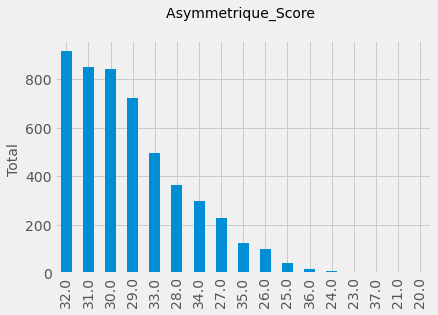

In [443]:
plt.style.use('fivethirtyeight')
 
plt.title("Asymmetrique_Score \n", size = '14')
plt.ylabel("Total ", size = '14')
leads['Asymmetrique_Score'].value_counts().plot.bar()

In [444]:
# Let's replace by mode:

leads['Asymmetrique_Score'].mode()

0    32.0
dtype: float64

In [445]:
# Replace missing values by 32.0 : 
leads['Asymmetrique_Score'].fillna(value = 32.0, inplace = True)
leads['Asymmetrique_Score'].isna().sum()

0

In [446]:
# To get dummy variables with so many scores will not work very well. Better is to categorize into 2 groups.

#Let's first create a function:

def f(row):
    if row['Asymmetrique_Score'] >= 30.0 : # above or equal to 30 is will become : "High score"
        result = 'High_Score'
    else:
        result = "Low_Score" # below 30 will become: "Low score"
    return result

# Then apply the function, f in the new column:

leads['Asymmetrique_Score'] = leads.apply(f, axis = 1)
leads['Asymmetrique_Score'].head()

0    High_Score
1    High_Score
2    High_Score
3    High_Score
4    High_Score
Name: Asymmetrique_Score, dtype: object

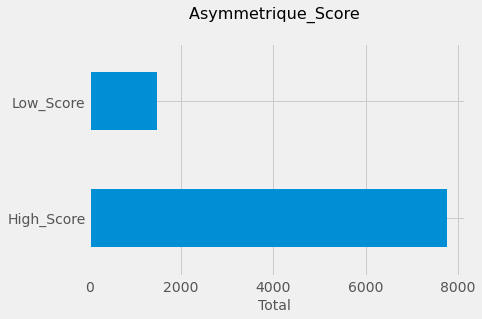

In [447]:
# Let's visualise this column: 
plt.title("Asymmetrique_Score \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Asymmetrique_Score'].value_counts().plot.barh()

##### Asymmetrique Profile Index

In [448]:
 
plt.title("Asymmetrique Profile Index \n", size = '14')
plt.xlabel("Total ", size = '14')
leads['Asymmetrique Profile Index'].value_counts().plot.barh()

In [449]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [450]:
# Let's give the missing values a low score: 
leads['Asymmetrique Profile Index'].fillna(value = "03.Low", inplace = True)
leads['Asymmetrique Profile Index'].isna().sum()

0

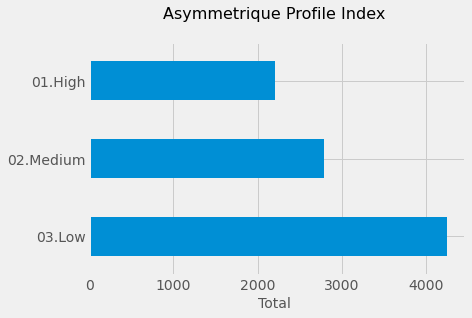

In [451]:
 
plt.title("Asymmetrique Profile Index \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Asymmetrique Profile Index'].value_counts().plot.barh()

##### Asymmetrique Activity Index

In [452]:

plt.title("Asymmetrique Activity Index \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Asymmetrique Activity Index'].value_counts().plot.barh()

In [453]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [454]:
# Replace missing values also by low score: 
leads['Asymmetrique Activity Index'].fillna(value = "03.Low", inplace = True)
leads['Asymmetrique Activity Index'].isna().sum()

0

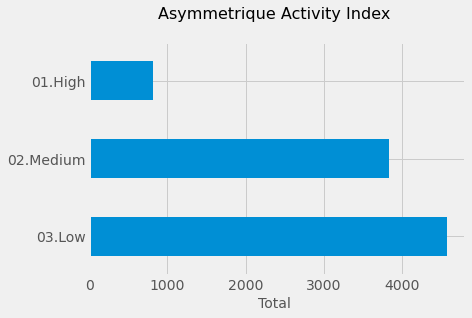

In [455]:

plt.title("Asymmetrique Activity Index \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Asymmetrique Activity Index'].value_counts().plot.barh()

##### Tags

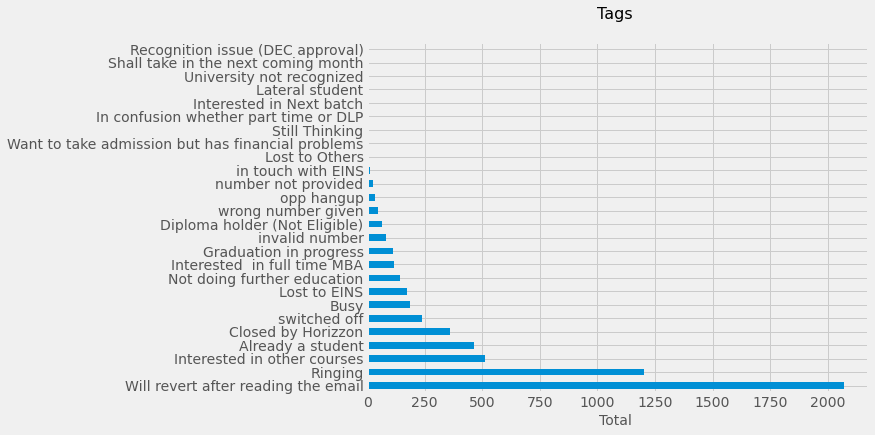

In [456]:

plt.figure( figsize = (8, 6))
 
plt.title("Tags \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Tags'].value_counts().plot.barh()

In [457]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [458]:
# Replace missing values by "Will revert after reading the email":
leads['Tags'].fillna(value = 'Will revert after reading the email', inplace = True)

In [459]:
leads['Tags'].isna().sum()

0

In [460]:
# Also here we have to replace all the other rows by something else. Replace by "Other_tags"
leads['Tags'].replace('Recognition issue (DEC approval)', 'Other_tags', inplace = True)
leads['Tags'].replace('Shall take in the next coming month', 'Other_tags', inplace = True)
leads['Tags'].replace('University not recognized', 'Other_tags', inplace = True)
leads['Tags'].replace('Lateral student', 'Other_tags', inplace = True)
leads['Tags'].replace('Interested in Next batch', 'Other_tags', inplace = True)
leads['Tags'].replace('In confusion whether part time or DLP', 'Other_tags', inplace = True)
leads['Tags'].replace('Want to take admission but has financial problems', 'Other_tags', inplace = True)
leads['Tags'].replace('Still Thinking', 'Other_tags', inplace = True)
leads['Tags'].replace('Lost to Others', 'Other_tags', inplace = True)
leads['Tags'].replace('in touch with EINS', 'Other_tags', inplace = True)
leads['Tags'].replace('opp hangup', 'Other_tags', inplace = True)
leads['Tags'].replace('wrong number given', 'Other_tags', inplace = True)
leads['Tags'].replace('number not provided', 'Other_tags', inplace = True)
leads['Tags'].replace('Diploma holder (Not Eligible)', 'Other_tags', inplace = True)
leads['Tags'].replace('invalid number', 'Other_tags', inplace = True)


plt.title("Tags \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Tags'].value_counts().plot.barh()

##### What matters most to you in choosing a course:

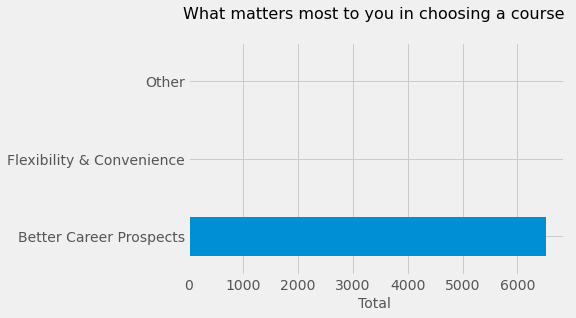

In [461]:
 
plt.title("What matters most to you in choosing a course \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['What matters most to you in choosing a course'].value_counts().plot.barh()

In [462]:
# Drop this column:
leads = leads.drop(['What matters most to you in choosing a course'], axis = 1)
leads.shape

(9240, 35)

##### Lead Profile

In [463]:

plt.title("Lead Profile \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Lead Profile'].value_counts().plot.barh()

In [464]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [465]:
# Replace missing values by "Potential Lead":
leads['Lead Profile'].fillna(value = 'Potential Lead', inplace = True)

In [466]:
leads['Lead Profile'].isna().sum()

0

In [467]:
# Also here we have to replace all the other rows by something else. Replace by "Potential Lead"
leads['Lead Profile'].replace('Select', 'Potential Lead', inplace = True)
leads['Lead Profile'].replace('Student of SomeSchool', 'Potential Lead', inplace = True)
leads['Lead Profile'].replace('Lateral Student', 'Potential Lead', inplace = True)
leads['Lead Profile'].replace('Dual Specialization Student', 'Potential Lead', inplace = True)

plt.style.use('fivethirtyeight')
 
plt.title("Lead Profile \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Lead Profile'].value_counts().plot.barh()

##### What is your current occupation

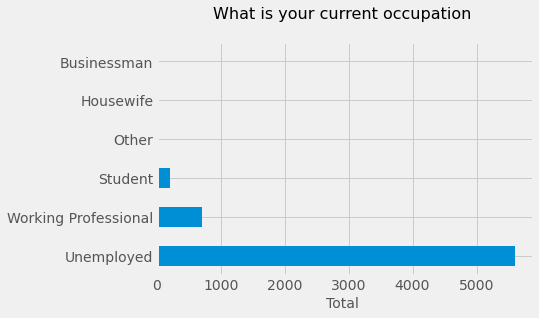

In [468]:

plt.title("What is your current occupation \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['What is your current occupation'].value_counts().plot.barh()

In [469]:
# Let's drop this column:
leads = leads.drop(['What is your current occupation'], axis = 1)
leads.shape

(9240, 34)

##### Country

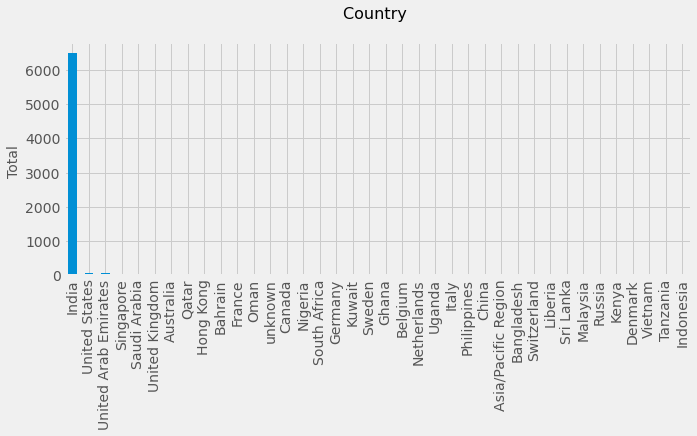

In [470]:
 
plt.figure(figsize = (10, 4))
plt.title("Country \n", size = '16')
plt.ylabel("Total ", size = '14')
leads['Country'].value_counts().plot.bar()

In [471]:
# Let's also drop this column:
leads = leads.drop(['Country'], axis = 1)
leads.shape

(9240, 33)

##### How did you hear about X Education

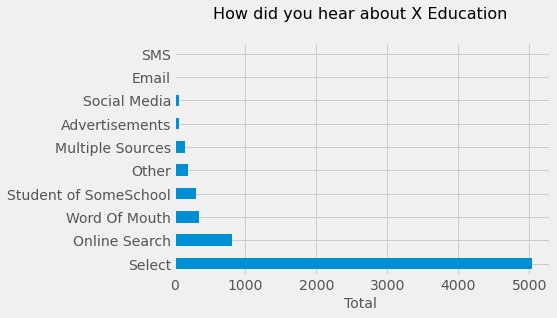

In [472]:

plt.title("How did you hear about X Education \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['How did you hear about X Education'].value_counts().plot.barh()

In [473]:
# Drop this column:
leads = leads.drop(['How did you hear about X Education'], axis = 1)
leads.shape

(9240, 32)

##### Specialization

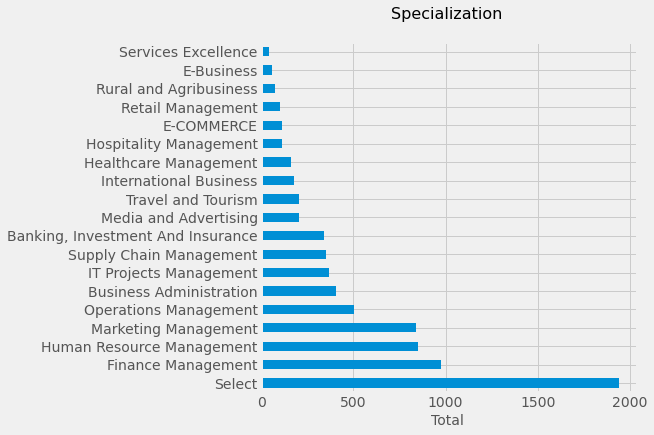

In [474]:
plt.figure(figsize = (6, 6))
plt.title("Specialization \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Specialization'].value_counts().plot.barh()

In [475]:
# Better drop this column
leads = leads.drop(['Specialization'], axis = 1)
leads.shape

(9240, 31)

##### City

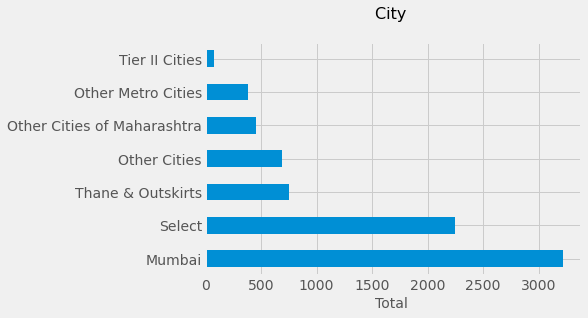

In [476]:
plt.title("City \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['City'].value_counts().plot.barh()

In [477]:
# The company offers online courses. It doesn't matter where people are living.Let's drop this column:
leads = leads.drop(['City'], axis = 1)
leads.shape

(9240, 30)

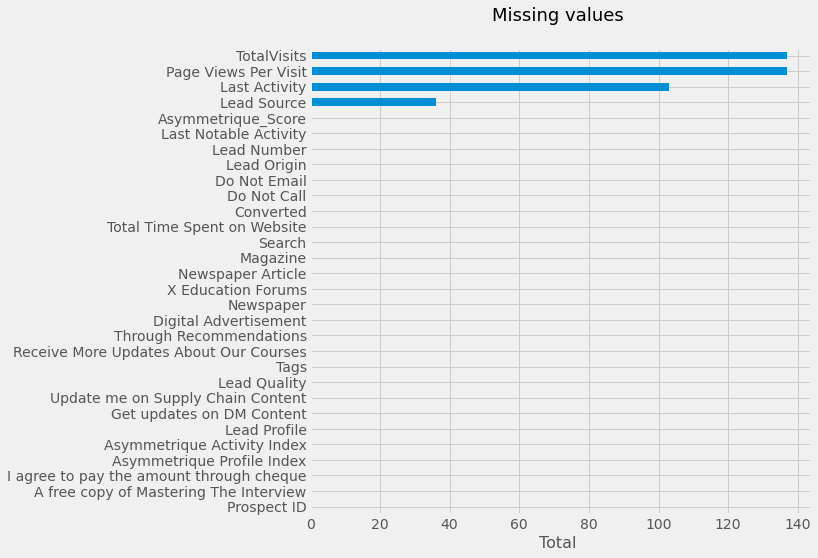

In [478]:
# Missing data:

plt.figure(figsize = (8, 8))
plt.title("Missing values \n", size = '18')
plt.xlabel("Total ", size = '16')
leads.isna().sum().sort_values(ascending = True).plot.barh()

In [479]:
leads.shape

(9240, 30)

In [480]:
# The amount of missing values are very low compated to the size of dataset.
# Let's drop the rows with null values:

leads = leads[pd.notnull(leads['TotalVisits'])]
leads = leads[pd.notnull(leads['Page Views Per Visit'])]
leads = leads[pd.notnull(leads['Last Activity'])]
leads = leads[pd.notnull(leads['Lead Source'])]

In [481]:
leads.isna().sum().sort_values(ascending = False)

Asymmetrique_Score                          0
Last Notable Activity                       0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Lead Quality                      

In [482]:
#Let's also drop Prospect ID
leads = leads.drop(['Prospect ID'], axis = 1)
leads.shape

(9074, 29)

In [483]:
leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ...      Lead Quality  \
0                   0.0  Page Visited on Website  ...  Low in Relevance   
1                   2.5             Email Opened  ...          Might be   
2                   2.0             Email Opened  ...          Might be   
3                   1.0              Unreachable  ...          Not Sure   
4                   1.0        Converted to Lead  ...          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No  Potential Lead   
1                                No                        No  Potential Lead   
2                                No                        No  Potential Lead   
3                                No                        No  Potential Lead   
4                                No                        No  Potential Lead   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

  Asymmetrique_Score  
0         High_Score  
1         High_Score  
2         High_Score  
3         High_Score  
4         High_Score  

[5 rows x 29 columns]

#### 2.3 Categorical variables

In [484]:
leads_cat = leads.select_dtypes(include = ['object'])
leads_cat.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

             Last Activity Search Magazine Newspaper Article  \
0  Page Visited on Website     No       No                No   
1             Email Opened     No       No                No   
2             Email Opened     No       No                No   
3              Unreachable     No       No                No   
4        Converted to Lead     No       No                No   

  X Education Forums Newspaper  ...      Lead Quality  \
0                 No        No  ...  Low in Relevance   
1                 No        No  ...          Might be   
2                 No        No  ...          Might be   
3                 No        No  ...          Not Sure   
4                 No        No  ...          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No  Potential Lead   
1                                No                        No  Potential Lead   
2                                No                        No  Potential Lead   
3                                No                        No  Potential Lead   
4                                No                        No  Potential Lead   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

  Asymmetrique_Score  
0         High_Score  
1         High_Score  
2         High_Score  
3         High_Score  
4         High_Score  

[5 rows x 24 columns]

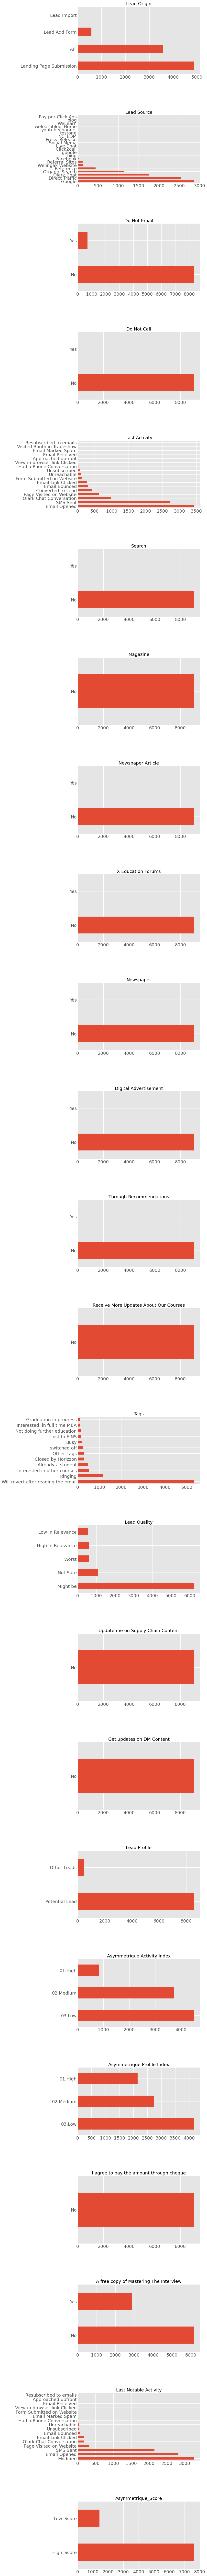

In [485]:
# Let's visualize:

plt.style.use('ggplot')

c = 1  # initialize plot counter

fig = plt.figure(figsize = (8,180))
plt.subplots_adjust(hspace = 0.6) # Horizontal space between charts
for col in leads_cat:
    plt.subplot(24, 1, c)
    plt.title('{}'.format(col), size = '18')
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    leads[col].value_counts().plot.barh()
    c = c + 1

In [486]:
# Drop: "Do Not Email", "Do Not Call", "Search", "Magazine", "X Education Forums", "Newspaper",
# "Digital Advertisement", Through Recommendations" , "Receive More Updates About Our Courses"
leads = leads.drop(["Do Not Email", "Do Not Call", "Search", "Magazine", "X Education Forums", "Newspaper"
                    , "Newspaper Article", "Digital Advertisement", "Through Recommendations",
                    "Receive More Updates About Our Courses", "Update me on Supply Chain Content", 
                   "Get updates on DM Content", "I agree to pay the amount through cheque"], axis = 1)
leads.shape

(9074, 16)

In [487]:
leads.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity                                 Tags  \
0  Page Visited on Website          Interested in other courses   
1             Email Opened                              Ringing   
2             Email Opened  Will revert after reading the email   
3              Unreachable                              Ringing   
4        Converted to Lead  Will revert after reading the email   

       Lead Quality    Lead Profile Asymmetrique Activity Index  \
0  Low in Relevance  Potential Lead                   02.Medium   
1          Might be  Potential Lead                   02.Medium   
2          Might be  Potential Lead                   02.Medium   
3          Not Sure  Potential Lead                   02.Medium   
4          Might be  Potential Lead                   02.Medium   

  Asymmetrique Profile Index A free copy of Mastering The Interview  \
0                  02.Medium                                     No   
1                  02.Medium                                     No   
2                    01.High                                    Yes   
3                    01.High                                     No   
4                    01.High                                     No   

  Last Notable Activity Asymmetrique_Score  
0              Modified         High_Score  
1          Email Opened         High_Score  
2          Email Opened         High_Score  
3              Modified         High_Score  
4              Modified         High_Score

In [488]:
# We have two columns which seems to have the same data. Let's have a look:

##### Last Activity

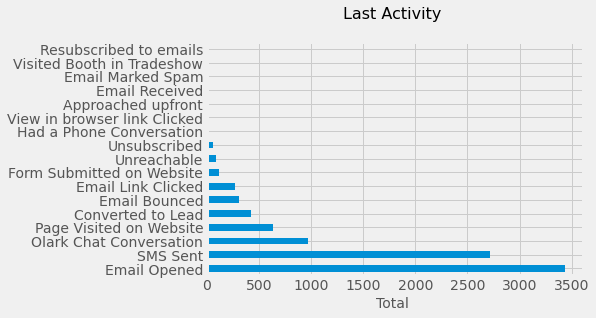

In [489]:
plt.style.use('fivethirtyeight')


plt.title("Last Activity \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Last Activity'].value_counts().plot.barh()

In [490]:
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Last Notable Activity 

In [491]:
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [492]:
# Let's drop "Last Activity"
leads = leads.drop(["Last Activity"], axis = 1)

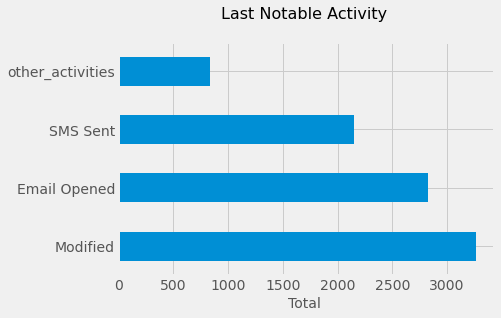

In [493]:
#### We have two columns that looks very similar: "Last Activity" and "Last Notable Activity". Let's have a look:

leads['Last Notable Activity'].replace('View in browser link Clicked', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Email Received', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Form Submitted on Website', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Resubscribed to emails', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Approached upfront', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Email Marked Spam', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Had a Phone Conversation', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Unreachable', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Unsubscribed', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Email Bounced', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Email Link Clicked', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Page Visited on Website', 'other_activities', inplace = True)
leads['Last Notable Activity'].replace('Olark Chat Conversation', 'other_activities', inplace = True)
leads['Last Notable Activity'].value_counts().plot.barh()


plt.title("Last Notable Activity \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Last Notable Activity'].value_counts().plot.barh()

In [494]:
leads.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance  Potential Lead   
1                              Ringing          Might be  Potential Lead   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure  Potential Lead   
4  Will revert after reading the email          Might be  Potential Lead   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

  Asymmetrique_Score  
0         High_Score  
1         High_Score  
2         High_Score  
3         High_Score  
4         High_Score

#### Lead Source

In [495]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
testone                 1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

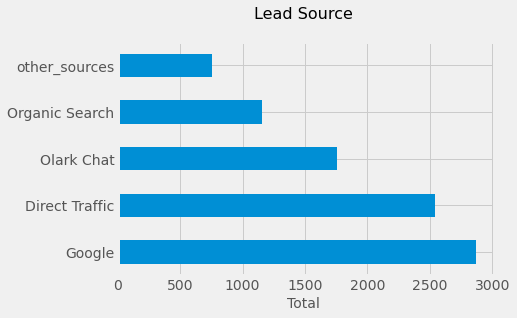

In [496]:
# Same situation here:

leads['Lead Source'].replace('Pay per Click Ads', 'other_sources', inplace = True)
leads['Lead Source'].replace('testone', 'other_sources', inplace = True)
leads['Lead Source'].replace('WeLearn', 'other_sources', inplace = True)
leads['Lead Source'].replace('youtubechannel', 'other_sources', inplace = True)
leads['Lead Source'].replace('NC_EDM', 'other_sources', inplace = True)
leads['Lead Source'].replace('welearnblog_Home', 'other_sources', inplace = True)
leads['Lead Source'].replace('blog', 'other_sources', inplace = True)
leads['Lead Source'].replace('Live Chat', 'other_sources', inplace = True)
leads['Lead Source'].replace('Press_Release', 'other_sources', inplace = True)
leads['Lead Source'].replace('Social Media', 'other_sources', inplace = True)
leads['Lead Source'].replace('Click2call', 'other_sources', inplace = True)
leads['Lead Source'].replace('google', 'other_sources', inplace = True)
leads['Lead Source'].replace('bing', 'other_sources', inplace = True)
leads['Lead Source'].replace('Facebook', 'other_sources', inplace = True)
leads['Lead Source'].replace('Referral Sites', 'other_sources', inplace = True)
leads['Lead Source'].replace('Welingak Website', 'other_sources', inplace = True)
leads['Lead Source'].replace('Reference', 'other_sources', inplace = True)


plt.title("Lead Source \n", size = '16')
plt.xlabel("Total ", size = '14')
leads['Lead Source'].value_counts().plot.barh()

#### 2.4 Numerical vriables

In [497]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.456028                   482.887481   
std     23348.029512     0.485053     4.858802                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596406.000000     0.000000     1.000000                    11.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
75%    637176.500000     1.000000     5.000000                   922.750000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

In [498]:
# Creating a new dataframe with numerical columns
leads_num = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
leads_num.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
0          0.0                            0                   0.0
1          5.0                          674                   2.5
2          2.0                         1532                   2.0
3          1.0                          305                   1.0
4          2.0                         1428                   1.0

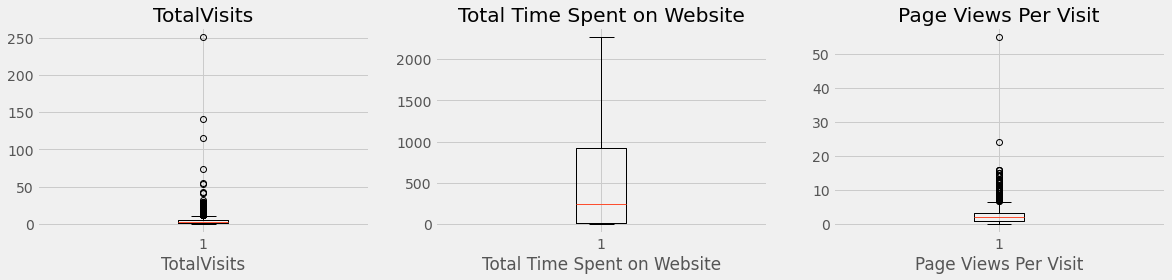

In [499]:
# Code below will create plots from leads_num df.

c = 1 
fig = plt.figure(figsize = (18,12))

for col in leads_num:
    plt.subplot(3, 3, c)
    plt.title('{}'.format(col))
    plt.xlabel(col)
    plt.boxplot(x = leads_num[col])
    c = c + 1

### 3. Create dummy variables.

In [500]:
# Creating a new df with categorical varibles
leads_cat1 = leads.select_dtypes(include = ['object'])
leads_cat1.head()

Lead Origin     Lead Source  \
0                      API      Olark Chat   
1                      API  Organic Search   
2  Landing Page Submission  Direct Traffic   
3  Landing Page Submission  Direct Traffic   
4  Landing Page Submission          Google   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance  Potential Lead   
1                              Ringing          Might be  Potential Lead   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure  Potential Lead   
4  Will revert after reading the email          Might be  Potential Lead   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

  Asymmetrique_Score  
0         High_Score  
1         High_Score  
2         High_Score  
3         High_Score  
4         High_Score

In [501]:
leads_cat1.columns

Index(['Lead Origin', 'Lead Source', 'Tags', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Asymmetrique_Score'],
      dtype='object')

In [502]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Tags', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Asymmetrique_Score']], drop_first = True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis = 1)

In [503]:
leads.shape

(9074, 47)

In [504]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Tags', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Asymmetrique_Score'], 1)

In [505]:
leads.shape

(9074, 37)

In [506]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Lead Number                                 9074 non-null   int64  
 1   Converted                                   9074 non-null   int64  
 2   TotalVisits                                 9074 non-null   float64
 3   Total Time Spent on Website                 9074 non-null   int64  
 4   Page Views Per Visit                        9074 non-null   float64
 5   Lead Origin_Landing Page Submission         9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                   9074 non-null   uint8  
 7   Lead Origin_Lead Import                     9074 non-null   uint8  
 8   Lead Source_Google                          9074 non-null   uint8  
 9   Lead Source_Olark Chat                      9074 non-null   uint8  
 10  Lead Source_

### 4. Model building.

#### 4.1 Importing required package and splitting into x and y.

In [507]:
from sklearn.model_selection import train_test_split

In [508]:
leads.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
0                          0                        0                   0   
1                          0                        0                   0   
2                          0                        0                   0   
3                          0                        0                   0   
4                          0                        0                   1   

   Lead Source_Olark Chat  ...  Lead Profile_Potential Lead  \
0                       1  ...                            1   
1                       0  ...                            1   
2                       0  ...                            1   
3                       0  ...                            1   
4                       0  ...                            1   

   Asymmetrique Activity Index_02.Medium  Asymmetrique Activity Index_03.Low  \
0                                      1                                   0   
1                                      1                                   0   
2                                      1                                   0   
3                                      1                                   0   
4                                      1                                   0   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
0                                     1                                  0   
1                                     1                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   A free copy of Mastering The Interview_Yes  Last Notable Activity_Modified  \
0                                           0                               1   
1                                           0                               0   
2                                           1                               0   
3                                           0                               1   
4                                           0                               1   

   Last Notable Activity_SMS Sent  Last Notable Activity_other_activities  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   

   Asymmetrique_Score_Low_Score  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 37 columns]

In [509]:
# Putting feature variable to X
X = leads.drop(['Lead Number','Converted'], axis = 1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_other_sources  ...  \
0                           0                          0  ...   
1                           1                          0  ...   
2                           0                          0  ...   
3                           0                          0  ...   
4                           0                          0  ...   

   Lead Profile_Potential Lead  Asymmetrique Activity Index_02.Medium  \
0                            1                                      1   
1                            1                                      1   
2                            1                                      1   
3                            1                                      1   
4                            1                                      1   

   Asymmetrique Activity Index_03.Low  Asymmetrique Profile Index_02.Medium  \
0                                   0                                     1   
1                                   0                                     1   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   

   Asymmetrique Profile Index_03.Low  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   A free copy of Mastering The Interview_Yes  Last Notable Activity_Modified  \
0                                           0                               1   
1                                           0                               0   
2                                           1                               0   
3                                           0                               1   
4                                           0                               1   

   Last Notable Activity_SMS Sent  Last Notable Activity_other_activities  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   

   Asymmetrique_Score_Low_Score  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 35 columns]

In [510]:
# Putting converted variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [511]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [512]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

#### 4.2 Scaling

In [513]:
from sklearn.preprocessing import StandardScaler

In [514]:
leads.describe

<bound method NDFrame.describe of       Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0          660737          0          0.0                            0   
1          660728          0          5.0                          674   
2          660727          1          2.0                         1532   
3          660719          0          1.0                          305   
4          660681          1          2.0                         1428   
...           ...        ...          ...                          ...   
9235       579564          1          8.0                         1845   
9236       579546          0          2.0                          238   
9237       579545          0          2.0                          199   
9238       579538          1          3.0                          499   
9239       579533          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0         

In [515]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit'
        ]]= scaler.fit_transform(X_train[['TotalVisits',
        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009    -0.284595                    -0.160255             -0.179666   
1012    -0.284595                    -0.540048             -0.179666   
9226    -0.671384                    -0.888650             -1.132538   
4750    -0.284595                     1.643304             -0.179666   
7987     0.295588                     2.017593              0.058552   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
3009                        0                   0                       0   
1012                        0                   0                       0   
9226                        0                   0                       1   
4750                        0                   0                       0   
7987                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_other_sources  ...  \
3009                           0                          0  ...   
1012                           0                          0  ...   
9226                           0                          0  ...   
4750                           0                          0  ...   
7987                           0                          0  ...   

      Lead Profile_Potential Lead  Asymmetrique Activity Index_02.Medium  \
3009                            1                                      0   
1012                            1                                      1   
9226                            1                                      0   
4750                            1                                      0   
7987                            1                                      1   

      Asymmetrique Activity Index_03.Low  \
3009                                   1   
1012                                   0   
9226                                   0   
4750                                   1   
7987                                   0   

      Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
3009                                     0                                  1   
1012                                     0                                  0   
9226                                     1                                  0   
4750                                     0                                  1   
7987                                     0                                  0   

      A free copy of Mastering The Interview_Yes  \
3009                                           1   
1012                                           0   
9226                                           0   
4750                                           0   
7987                                           0   

      Last Notable Activity_Modified  Last Notable Activity_SMS Sent  \
3009                               0                               0   
1012                               0                               0   
9226                               1                               0   
4750                               0                               1   
7987                               1                               0   

      Last Notable Activity_other_activities  Asymmetrique_Score_Low_Score  
3009                                       0                             0  
1012                                       1                             0  
9226                                       0                             0  
4750 

In [516]:
# Checking the Converted Rate

converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.85541106458012

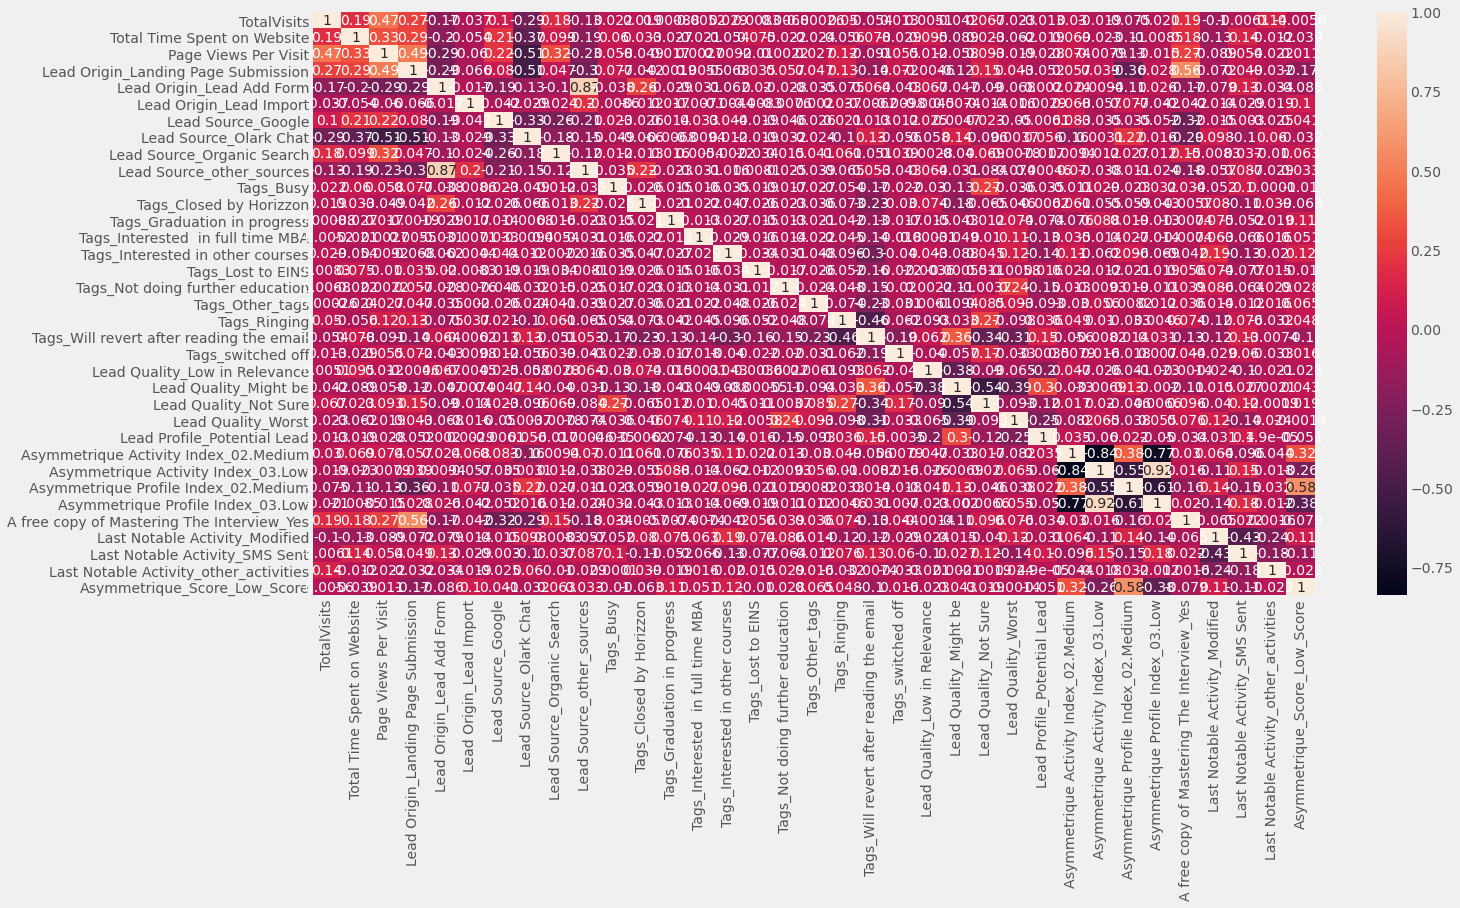

In [517]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [518]:
corr = X_train.corr()

In [519]:
X_train.shape

(6351, 35)

In [520]:
corr.sort_values(by = "TotalVisits", ascending = True)

TotalVisits  \
Lead Source_Olark Chat                        -0.286592   
Lead Origin_Lead Add Form                     -0.172404   
Lead Source_other_sources                     -0.126625   
Last Notable Activity_Modified                -0.100560   
Asymmetrique Profile Index_02.Medium          -0.074928   
Tags_Will revert after reading the email      -0.054466   
Lead Quality_Might be                         -0.041733   
Lead Origin_Lead Import                       -0.037380   
Lead Quality_Worst                            -0.023426   
Asymmetrique Profile Index_03.Low             -0.021183   
Asymmetrique Activity Index_03.Low            -0.019097   
Lead Profile_Potential Lead                   -0.013140   
Last Notable Activity_SMS Sent                -0.006087   
Asymmetrique_Score_Low_Score                  -0.005603   
Tags_Interested  in full time MBA             -0.005228   
Tags_Other_tags                               -0.000259   
Tags_Graduation in progress                    0.000881   
Lead Quality_Low in Relevance                  0.005126   
Tags_Not doing further education               0.006823   
Tags_Lost to EINS                              0.008312   
Tags_switched off                              0.013390   
Tags_Closed by Horizzon                        0.019313   
Tags_Busy                                      0.022038   
Tags_Interested in other courses               0.028798   
Asymmetrique Activity Index_02.Medium          0.030493   
Tags_Ringing                                   0.050402   
Lead Quality_Not Sure                          0.067178   
Lead Source_Google                             0.100996   
Last Notable Activity_other_activities         0.136297   
Lead Source_Organic Search                     0.183585   
A free copy of Mastering The Interview_Yes     0.194136   
Total Time Spent on Website                    0.194837   
Lead Origin_Landing Page Submission            0.269443   
Page Views Per Visit                           0.467970   
TotalVisits                                    1.000000   

                                            Total Time Spent on Website  \
Lead Source_Olark Chat                                        -0.373972   
Lead Origin_Lead Add Form                                     -0.198886   
Lead Source_other_sources                                     -0.185846   
Last Notable Activity_Modified                                -0.125918   
Asymmetrique Profile Index_02.Medium                          -0.107586   
Tags_Will revert after reading the email                       0.077957   
Lead Quality_Might be                                         -0.088554   
Lead Origin_Lead Import                                       -0.054374   
Lead Quality_Worst                                            -0.062254   
Asymmetrique Profile Index_03.Low                             -0.008457   
Asymmetrique Activity Index_03.Low                            -0.022797   
Lead Profile_Potential Lead                                   -0.018756   
Last Notable Activity_SMS Sent                                 0.143708   
Asymmetrique_Score_Low_Score                                  -0.038568   
Tags_Interested  in full time MBA                             -0.020897   
Tags_Other_tags                                               -0.024092   
Tags_Graduation in progress                                   -0.027175   
Lead Quality_Low in Relevance                                  0.095259   
Tags_Not doing further education                              -0.021526   
Tags_Lost to EINS                                              0.074887   
Tags_switched off                                             -0.028980   
Tags_Closed by Horizzon                                        0.032556   
Tags_Busy                                                      0.059576   
Tags_Interested in other courses                              -0.053923   
Asymmetrique Activity Index_02.Medium       

#### 4.3 Building logistic regression model.

In [521]:
# Importing the required packages

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [522]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1474.8
Date:                Mon, 08 Mar 2021   Deviance:                       2949.5
Time:                        15:33:42   Pearson chi2:                 2.56e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.4520      0.947     -0.477      0.633      -2.309       1.405
TotalVisits                                    0.1227      0.036      3.427      0.001       0.053       0.193
Total Time Spent on Website                    1.1635      0.057     20.325      0.000       1.051       1.276
Page Views Per Visit                          -0.0577      0.066     -0.874      0.382      -0.187       0.072
Lead Origin_Landing Page Submission           -0.5667      0.161     -3.514      0.000      -0.883      -0.251
Lead Origin_Lead Add Form                      3.3134      0.479      6.911      0.000       2.374       4.253
Lead Origin_Lead Import                        1.5853      0.791      2.003      0.045       0.034       3.136
Lead Source_Google                             0.1978      0.159      1.245      0.213      -0.114       0.509
Lead Source_Olark Chat                         0.6313      0.214      2.954      0.003       0.212       1.050
Lead Source_Organic Search                     0.1016      0.186      0.546      0.585      -0.263       0.466
Lead Source_other_sources                      0.2492      0.380      0.655      0.512      -0.496       0.995
Tags_Busy                                      2.6036      0.844      3.083      0.002       0.948       4.259
Tags_Closed by Horizzon                        8.5272      1.099      7.760      0.000       6.373      10.681
Tags_Graduation in progress                    2.0151      1.038      1.941      0.052      -0.019       4.050
Tags_Interested  in full time MBA             -0.5130      1.234     -0.416      0.678      -2.932       1.906
Tags_Interested in other courses              -0.1372      0.885     -0.155      0.877      -1.872       1.598
Tags_Lost to EINS                              9.9172      1.084      9.152      0.000       7.793      12.041
Tags_Not doing further education              -1.1911      1.574     -0.757      0.449      -4.276       1.894
Tags_Other_tags                               -0.3435      0.876     -0.392      0.695      -2.060       1.373
Tags_Ringing                                  -1.9065      0.847     -2.251      0.024      -3.567      -0.246
Tags_Will revert after reading the email       4.5509      0.804      5.658      0.000       2.974       6.127
Tags_switched off                             -1.3936      0.974     -1.431      0.153      -3.303       0.516
Lead Quality_Low in Relevance                 -0.3618      0.449     -0.806      0.420      -1.241       0.518
Lead Quality_Might be                         -3.6199      0.376     -9.623      0.000      -4.357      -2.883
Lead Quality_Not Sure                         -1.7285      0.436     -3.968      0.000

In [523]:
logreg = LogisticRegression()

In [524]:
# Running RFE
rfe = RFE(logreg, 40)              
rfe = rfe.fit(X_train, y_train)

In [525]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [526]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_other_sources', True, 1),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Graduation in progress', True, 1),
 ('Tags_Interested  in full time MBA', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Not doing further education', True, 1),
 ('Tags_Other_tags', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_switched off', True, 1),
 ('Lead Quality_Low in Relevance', True, 1),
 ('Lead Quality_Might be', True, 1),
 ('Lead Quality_Not Sure', True, 1),
 ('Lead Quality_Worst', True, 1),
 ('Lead Profile_Potent

In [527]:
col = X_train.columns[rfe.support_]

In [528]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [529]:

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1474.8
Date:                Mon, 08 Mar 2021   Deviance:                       2949.5
Time:                        15:33:43   Pearson chi2:                 2.56e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [530]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

3009    0.148955
1012    0.134827
9226    0.001157
4750    0.957444
7987    0.999673
          ...   
367     0.240732
82      0.323741
8199    0.223508
7077    0.025447
5754    0.002800
Length: 6351, dtype: float64

In [531]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.14895535, 0.13482682, 0.00115742, ..., 0.22350768, 0.02544681,
       0.00279983])

In [532]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

Conv  Conv_Prob  Lead_ID
0     0   0.148955     3009
1     0   0.134827     1012
2     0   0.001157     9226
3     1   0.957444     4750
4     1   0.999673     7987

In [533]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Conv  Conv_Prob  Lead_ID  predicted
0     0   0.148955     3009          0
1     0   0.134827     1012          0
2     0   0.001157     9226          0
3     1   0.957444     4750          1
4     1   0.999673     7987          1

In [534]:
from sklearn import metrics

In [535]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
print(confusion)

[[3679  226]
 [ 325 2121]]


In [536]:
# Predicted     not_converted    converted
# Actual
# not_converted        3679      226
# converted           325       2121

In [537]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.91324200913242


In [538]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [539]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
27          Asymmetrique Activity Index_03.Low  22.64
25                 Lead Profile_Potential Lead  16.73
29           Asymmetrique Profile Index_03.Low  15.29
19    Tags_Will revert after reading the email  14.58
22                       Lead Quality_Might be  12.13
26       Asymmetrique Activity Index_02.Medium   7.00
9                    Lead Source_other_sources   6.41
4                    Lead Origin_Lead Add Form   6.36
3          Lead Origin_Landing Page Submission   5.66
18                                Tags_Ringing   4.19
28        Asymmetrique Profile Index_02.Medium   3.97
7                       Lead Source_Olark Chat   3.63
6                           Lead Source_Google   3.29
23                       Lead Quality_Not Sure   3.16
30  A free copy of Mastering The Interview_Yes   2.95
34                Asymmetrique_Score_Low_Score   2.45
31              Last Notable Activity_Modified   2.40
14            Tags_Interested in other courses   2.25
2                         Page Views Per Visit   2.10
24                          Lead Quality_Worst   2.09
32              Last Notable Activity_SMS Sent   2.04
11                     Tags_Closed by Horizzon   1.91
21               Lead Quality_Low in Relevance   1.78
8                   Lead Source_Organic Search   1.75
17                             Tags_Other_tags   1.73
20                           Tags_switched off   1.63
10                                   Tags_Busy   1.56
1                  Total Time Spent on Website   1.43
15                           Tags_Lost to EINS   1.42
33      Last Notable Activity_other_activities   1.36
0                                  TotalVisits   1.35
12                 Tags_Graduation in progress   1.29
16            Tags_Not doing further education   1.27
5                      Lead Origin_Lead Import   1.27
13           Tags_Interested  in full time MBA   1.26

In [540]:
# Drop the columns with the highest VIF until we found values below 5
col = col.drop('Asymmetrique Activity Index_03.Low')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_sources', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Potential Lead', 'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable A

In [541]:
# Let's re-run the model using the selected variables
X_train_sm1 = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1477.2
Date:                Mon, 08 Mar 2021   Deviance:                       2954.4
Time:                        15:33:46   Pearson chi2:                 2.49e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [542]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
25                 Lead Profile_Potential Lead  16.26
19    Tags_Will revert after reading the email  13.96
22                       Lead Quality_Might be  12.07
9                    Lead Source_other_sources   6.41
28           Asymmetrique Profile Index_03.Low   6.36
4                    Lead Origin_Lead Add Form   6.35
3          Lead Origin_Landing Page Submission   5.61
26       Asymmetrique Activity Index_02.Medium   4.58
18                                Tags_Ringing   4.02
27        Asymmetrique Profile Index_02.Medium   3.79
7                       Lead Source_Olark Chat   3.63
6                           Lead Source_Google   3.28
23                       Lead Quality_Not Sure   3.14
29  A free copy of Mastering The Interview_Yes   2.95
30              Last Notable Activity_Modified   2.40
14            Tags_Interested in other courses   2.16
2                         Page Views Per Visit   2.10
33                Asymmetrique_Score_Low_Score   2.06
24                          Lead Quality_Worst   2.05
31              Last Notable Activity_SMS Sent   2.04
11                     Tags_Closed by Horizzon   1.86
21               Lead Quality_Low in Relevance   1.76
8                   Lead Source_Organic Search   1.75
17                             Tags_Other_tags   1.65
20                           Tags_switched off   1.59
10                                   Tags_Busy   1.54
1                  Total Time Spent on Website   1.43
15                           Tags_Lost to EINS   1.39
32      Last Notable Activity_other_activities   1.36
0                                  TotalVisits   1.35
5                      Lead Origin_Lead Import   1.27
16            Tags_Not doing further education   1.26
13           Tags_Interested  in full time MBA   1.25
12                 Tags_Graduation in progress   1.20

In [543]:
col = col.drop('Lead Profile_Potential Lead')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_sources', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notabl

In [544]:
# Let's re-run the model using the selected variables
X_train_sm2 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1489.3
Date:                Mon, 08 Mar 2021   Deviance:                       2978.6
Time:                        15:33:48   Pearson chi2:                 2.52e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [545]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
19    Tags_Will revert after reading the email  13.14
22                       Lead Quality_Might be  11.04
9                    Lead Source_other_sources   6.38
4                    Lead Origin_Lead Add Form   6.34
27           Asymmetrique Profile Index_03.Low   6.11
3          Lead Origin_Landing Page Submission   5.47
25       Asymmetrique Activity Index_02.Medium   4.38
18                                Tags_Ringing   3.86
26        Asymmetrique Profile Index_02.Medium   3.73
7                       Lead Source_Olark Chat   3.49
6                           Lead Source_Google   3.18
23                       Lead Quality_Not Sure   3.06
28  A free copy of Mastering The Interview_Yes   2.92
29              Last Notable Activity_Modified   2.37
14            Tags_Interested in other courses   2.14
2                         Page Views Per Visit   2.10
32                Asymmetrique_Score_Low_Score   2.06
30              Last Notable Activity_SMS Sent   2.02
24                          Lead Quality_Worst   1.97
11                     Tags_Closed by Horizzon   1.77
21               Lead Quality_Low in Relevance   1.76
8                   Lead Source_Organic Search   1.72
17                             Tags_Other_tags   1.63
20                           Tags_switched off   1.56
10                                   Tags_Busy   1.53
1                  Total Time Spent on Website   1.43
15                           Tags_Lost to EINS   1.37
31      Last Notable Activity_other_activities   1.35
0                                  TotalVisits   1.35
5                      Lead Origin_Lead Import   1.27
16            Tags_Not doing further education   1.26
13           Tags_Interested  in full time MBA   1.25
12                 Tags_Graduation in progress   1.19

In [546]:
col = col.drop('Tags_Will revert after reading the email')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_sources', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_tags', 'Tags_Ringing',
       'Tags_switched off', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity

In [547]:
# Let's re-run the model using the selected variables
X_train_sm3 = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1533.4
Date:                Mon, 08 Mar 2021   Deviance:                       3066.7
Time:                        15:33:50   Pearson chi2:                 2.31e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [548]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
21                       Lead Quality_Might be  9.55
9                    Lead Source_other_sources  6.32
4                    Lead Origin_Lead Add Form  6.26
26           Asymmetrique Profile Index_03.Low  5.20
3          Lead Origin_Landing Page Submission  5.02
24       Asymmetrique Activity Index_02.Medium  3.91
25        Asymmetrique Profile Index_02.Medium  3.56
7                       Lead Source_Olark Chat  3.04
22                       Lead Quality_Not Sure  2.94
27  A free copy of Mastering The Interview_Yes  2.90
6                           Lead Source_Google  2.89
28              Last Notable Activity_Modified  2.34
2                         Page Views Per Visit  2.10
31                Asymmetrique_Score_Low_Score  2.05
29              Last Notable Activity_SMS Sent  1.96
23                          Lead Quality_Worst  1.93
8                   Lead Source_Organic Search  1.65
20               Lead Quality_Low in Relevance  1.62
18                                Tags_Ringing  1.47
1                  Total Time Spent on Website  1.41
0                                  TotalVisits  1.35
30      Last Notable Activity_other_activities  1.34
11                     Tags_Closed by Horizzon  1.29
5                      Lead Origin_Lead Import  1.27
14            Tags_Interested in other courses  1.23
10                                   Tags_Busy  1.16
19                           Tags_switched off  1.12
17                             Tags_Other_tags  1.12
16            Tags_Not doing further education  1.12
12                 Tags_Graduation in progress  1.07
15                           Tags_Lost to EINS  1.06
13           Tags_Interested  in full time MBA  1.06

In [549]:
col = col.drop('Lead Quality_Might be')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_sources', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_tags', 'Tags_Ringing',
       'Tags_switched off', 'Lead Quality_Low in Relevance',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activities',
     

In [550]:
# Let's re-run the model using the selected variables
X_train_sm4 = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1622.9
Date:                Mon, 08 Mar 2021   Deviance:                       3245.9
Time:                        15:33:52   Pearson chi2:                 1.76e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [551]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                    Lead Origin_Lead Add Form  6.26
9                    Lead Source_other_sources  6.26
3          Lead Origin_Landing Page Submission  4.50
25           Asymmetrique Profile Index_03.Low  3.98
23       Asymmetrique Activity Index_02.Medium  3.57
24        Asymmetrique Profile Index_02.Medium  3.11
26  A free copy of Mastering The Interview_Yes  2.85
7                       Lead Source_Olark Chat  2.68
6                           Lead Source_Google  2.60
27              Last Notable Activity_Modified  2.20
2                         Page Views Per Visit  2.10
30                Asymmetrique_Score_Low_Score  2.05
28              Last Notable Activity_SMS Sent  1.93
8                   Lead Source_Organic Search  1.60
21                       Lead Quality_Not Sure  1.51
18                                Tags_Ringing  1.45
1                  Total Time Spent on Website  1.40
0                                  TotalVisits  1.35
29      Last Notable Activity_other_activities  1.31
5                      Lead Origin_Lead Import  1.27
22                          Lead Quality_Worst  1.26
14            Tags_Interested in other courses  1.23
11                     Tags_Closed by Horizzon  1.19
10                                   Tags_Busy  1.16
20               Lead Quality_Low in Relevance  1.13
17                             Tags_Other_tags  1.12
19                           Tags_switched off  1.12
16            Tags_Not doing further education  1.12
12                 Tags_Graduation in progress  1.07
13           Tags_Interested  in full time MBA  1.06
15                           Tags_Lost to EINS  1.06

In [552]:
col = col.drop('Lead Origin_Lead Add Form')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_other_sources', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_tags', 'Tags_Ringing', 'Tags_switched off',
       'Lead Quality_Low in Relevance', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activities',
       'Asymmetrique_Score_Low_Score'],
 

In [553]:
# Let's re-run the model using the selected variables
X_train_sm5 = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1660.4
Date:                Mon, 08 Mar 2021   Deviance:                       3320.9
Time:                        15:33:54   Pearson chi2:                 1.62e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [554]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3          Lead Origin_Landing Page Submission  4.48
24           Asymmetrique Profile Index_03.Low  3.98
22       Asymmetrique Activity Index_02.Medium  3.55
23        Asymmetrique Profile Index_02.Medium  3.09
25  A free copy of Mastering The Interview_Yes  2.85
6                       Lead Source_Olark Chat  2.65
5                           Lead Source_Google  2.59
26              Last Notable Activity_Modified  2.20
29                Asymmetrique_Score_Low_Score  2.02
2                         Page Views Per Visit  2.00
27              Last Notable Activity_SMS Sent  1.91
8                    Lead Source_other_sources  1.81
7                   Lead Source_Organic Search  1.58
20                       Lead Quality_Not Sure  1.51
17                                Tags_Ringing  1.45
1                  Total Time Spent on Website  1.38
0                                  TotalVisits  1.35
28      Last Notable Activity_other_activities  1.31
21                          Lead Quality_Worst  1.26
13            Tags_Interested in other courses  1.23
10                     Tags_Closed by Horizzon  1.17
9                                    Tags_Busy  1.16
19               Lead Quality_Low in Relevance  1.13
16                             Tags_Other_tags  1.12
18                           Tags_switched off  1.12
15            Tags_Not doing further education  1.12
11                 Tags_Graduation in progress  1.07
4                      Lead Origin_Lead Import  1.07
14                           Tags_Lost to EINS  1.06
12           Tags_Interested  in full time MBA  1.06

In [555]:
col = col.drop('Lead Origin_Landing Page Submission')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_sources', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_tags', 'Tags_Ringing',
       'Tags_switched off', 'Lead Quality_Low in Relevance',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activities',
       'Asymmetrique_Score_Low_Score'],
      dtype='object')

In [556]:
# Let's re-run the model using the selected variables
X_train_sm6 = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1670.3
Date:                Mon, 08 Mar 2021   Deviance:                       3340.7
Time:                        15:33:56   Pearson chi2:                 1.57e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [557]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
23           Asymmetrique Profile Index_03.Low  3.67
21       Asymmetrique Activity Index_02.Medium  3.14
22        Asymmetrique Profile Index_02.Medium  3.07
5                       Lead Source_Olark Chat  2.59
4                           Lead Source_Google  2.54
25              Last Notable Activity_Modified  2.13
24  A free copy of Mastering The Interview_Yes  2.11
28                Asymmetrique_Score_Low_Score  2.01
2                         Page Views Per Visit  1.91
26              Last Notable Activity_SMS Sent  1.88
7                    Lead Source_other_sources  1.77
6                   Lead Source_Organic Search  1.57
19                       Lead Quality_Not Sure  1.51
16                                Tags_Ringing  1.44
1                  Total Time Spent on Website  1.38
0                                  TotalVisits  1.35
27      Last Notable Activity_other_activities  1.30
20                          Lead Quality_Worst  1.25
12            Tags_Interested in other courses  1.22
9                      Tags_Closed by Horizzon  1.17
8                                    Tags_Busy  1.16
18               Lead Quality_Low in Relevance  1.13
17                           Tags_switched off  1.12
14            Tags_Not doing further education  1.12
15                             Tags_Other_tags  1.11
3                      Lead Origin_Lead Import  1.07
13                           Tags_Lost to EINS  1.06
11           Tags_Interested  in full time MBA  1.06
10                 Tags_Graduation in progress  1.06

In [558]:
col = col.drop('Lead Origin_Lead Import')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_other_sources', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_tags', 'Tags_Ringing', 'Tags_switched off',
       'Lead Quality_Low in Relevance', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activities',
       'Asymmetrique_Score_Low_Score'],
      dtype='object')

In [559]:
# Let's re-run the model using the selected variables
X_train_sm7 = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1670.5
Date:                Mon, 08 Mar 2021   Deviance:                       3341.1
Time:                        15:33:57   Pearson chi2:                 1.57e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [560]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
22           Asymmetrique Profile Index_03.Low  3.66
20       Asymmetrique Activity Index_02.Medium  3.14
21        Asymmetrique Profile Index_02.Medium  3.07
4                       Lead Source_Olark Chat  2.59
3                           Lead Source_Google  2.53
24              Last Notable Activity_Modified  2.12
23  A free copy of Mastering The Interview_Yes  2.11
27                Asymmetrique_Score_Low_Score  2.00
2                         Page Views Per Visit  1.91
25              Last Notable Activity_SMS Sent  1.87
6                    Lead Source_other_sources  1.72
5                   Lead Source_Organic Search  1.57
18                       Lead Quality_Not Sure  1.51
15                                Tags_Ringing  1.44
1                  Total Time Spent on Website  1.38
0                                  TotalVisits  1.35
26      Last Notable Activity_other_activities  1.29
19                          Lead Quality_Worst  1.25
11            Tags_Interested in other courses  1.22
8                      Tags_Closed by Horizzon  1.16
7                                    Tags_Busy  1.16
16                           Tags_switched off  1.12
17               Lead Quality_Low in Relevance  1.12
13            Tags_Not doing further education  1.12
14                             Tags_Other_tags  1.11
12                           Tags_Lost to EINS  1.06
10           Tags_Interested  in full time MBA  1.06
9                  Tags_Graduation in progress  1.06

In [561]:
col = col.drop('Asymmetrique Profile Index_02.Medium')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_other_sources', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_tags', 'Tags_Ringing', 'Tags_switched off',
       'Lead Quality_Low in Relevance', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activities',
       'Asymmetrique_Score_Low_Score'],
      dtype='object')

In [562]:
# Let's re-run the model using the selected variables
X_train_sm8 = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial())
res = logm9.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1672.0
Date:                Mon, 08 Mar 2021   Deviance:                       3344.0
Time:                        15:33:59   Pearson chi2:                 1.56e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [563]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
21           Asymmetrique Profile Index_03.Low  3.21
20       Asymmetrique Activity Index_02.Medium  3.13
3                           Lead Source_Google  2.40
4                       Lead Source_Olark Chat  2.17
23              Last Notable Activity_Modified  2.07
22  A free copy of Mastering The Interview_Yes  2.07
2                         Page Views Per Visit  1.90
24              Last Notable Activity_SMS Sent  1.85
6                    Lead Source_other_sources  1.69
5                   Lead Source_Organic Search  1.50
18                       Lead Quality_Not Sure  1.50
26                Asymmetrique_Score_Low_Score  1.46
15                                Tags_Ringing  1.44
1                  Total Time Spent on Website  1.38
0                                  TotalVisits  1.35
25      Last Notable Activity_other_activities  1.28
19                          Lead Quality_Worst  1.25
11            Tags_Interested in other courses  1.22
8                      Tags_Closed by Horizzon  1.16
7                                    Tags_Busy  1.16
16                           Tags_switched off  1.12
17               Lead Quality_Low in Relevance  1.12
13            Tags_Not doing further education  1.12
14                             Tags_Other_tags  1.11
12                           Tags_Lost to EINS  1.06
10           Tags_Interested  in full time MBA  1.06
9                  Tags_Graduation in progress  1.06

In [564]:
col = col.drop('Asymmetrique Profile Index_03.Low')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_other_sources', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_tags', 'Tags_Ringing', 'Tags_switched off',
       'Lead Quality_Low in Relevance', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_02.Medium',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activities',
       'Asymmetrique_Score_Low_Score'],
      dtype='object')

In [565]:
# Let's re-run the model using the selected variables
X_train_sm9 = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm9, family = sm.families.Binomial())
res = logm10.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1673.4
Date:                Mon, 08 Mar 2021   Deviance:                       3346.8
Time:                        15:34:01   Pearson chi2:                 1.60e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [566]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
22              Last Notable Activity_Modified  2.01
20       Asymmetrique Activity Index_02.Medium  1.96
2                         Page Views Per Visit  1.90
4                       Lead Source_Olark Chat  1.89
3                           Lead Source_Google  1.84
21  A free copy of Mastering The Interview_Yes  1.70
23              Last Notable Activity_SMS Sent  1.69
6                    Lead Source_other_sources  1.50
18                       Lead Quality_Not Sure  1.50
25                Asymmetrique_Score_Low_Score  1.43
5                   Lead Source_Organic Search  1.40
15                                Tags_Ringing  1.40
1                  Total Time Spent on Website  1.38
0                                  TotalVisits  1.34
24      Last Notable Activity_other_activities  1.26
19                          Lead Quality_Worst  1.25
11            Tags_Interested in other courses  1.21
8                      Tags_Closed by Horizzon  1.16
7                                    Tags_Busy  1.16
14                             Tags_Other_tags  1.11
16                           Tags_switched off  1.11
17               Lead Quality_Low in Relevance  1.11
13            Tags_Not doing further education  1.11
12                           Tags_Lost to EINS  1.06
9                  Tags_Graduation in progress  1.06
10           Tags_Interested  in full time MBA  1.05

#### 4.4 Making prediction in the training data

In [567]:
y_train_pred = res.predict(X_train_sm9).values.reshape(-1)

In [568]:
y_train_pred

array([0.16918047, 0.21839969, 0.00087584, ..., 0.18348124, 0.0469785 ,
       0.00440248])

In [569]:
y_train_pred_final['Conv_Prob'] = y_train_pred

In [570]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Conv  Conv_Prob  Lead_ID  predicted
0     0   0.169180     3009          0
1     0   0.218400     1012          0
2     0   0.000876     9226          0
3     1   0.969031     4750          1
4     1   0.999781     7987          1

#### 4.5  Model accuracy

In [571]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.8976539127696426


In [572]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
confusion

array([[3629,  276],
       [ 374, 2072]], dtype=int64)

In [573]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted)

0.8976539127696426

In [574]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [575]:
# Let's see the sensitivity of our logistic regression model 
TP / float(TP+FN)

0.8470973017170891

In [576]:
# Let us calculate specificity
TN / float(TN+FP)

0.9293213828425096

In [577]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.0706786171574904


In [578]:
# positive predictive value 
print (TP / float(TP+FP))

0.8824531516183987


In [579]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9065700724456658


#### 4.6 Plot the ROC curve and probability cutoffs 

In [580]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

    return None

In [581]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conv, y_train_pred_final.Conv_Prob, drop_intermediate = False )

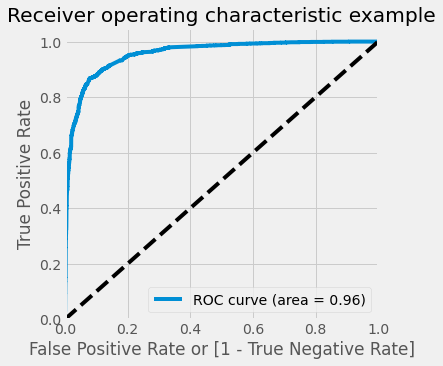

In [582]:
draw_roc(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

In [583]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conv  Conv_Prob  Lead_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.169180     3009          0    1    1    0    0    0    0    0   
1     0   0.218400     1012          0    1    1    1    0    0    0    0   
2     0   0.000876     9226          0    1    0    0    0    0    0    0   
3     1   0.969031     4750          1    1    1    1    1    1    1    1   
4     1   0.999781     7987          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    1    1    1

In [584]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.791686  0.977105  0.675544
0.2   0.2  0.856243  0.949714  0.797695
0.3   0.3  0.884900  0.901472  0.874520
0.4   0.4  0.893560  0.872854  0.906530
0.5   0.5  0.897654  0.847097  0.929321
0.6   0.6  0.894032  0.813573  0.944430
0.7   0.7  0.874350  0.737122  0.960307
0.8   0.8  0.860652  0.674980  0.976953
0.9   0.9  0.815620  0.539657  0.988476


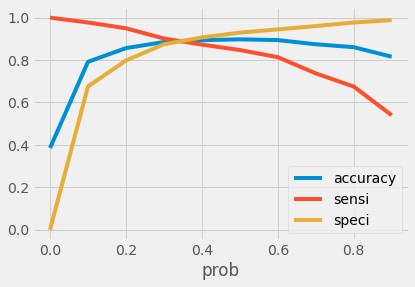

In [585]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

In [586]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [587]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Conv  Conv_Prob  Lead_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.169180     3009          0    1    1    0    0    0    0    0   
1     0   0.218400     1012          0    1    1    1    0    0    0    0   
2     0   0.000876     9226          0    1    0    0    0    0    0    0   
3     1   0.969031     4750          1    1    1    1    1    1    1    1   
4     1   0.999781     7987          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    1                1  
4    1    1    1                1

#### 4.7 Model accuracy after cutoff.

In [588]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted)

0.8849000157455519

In [589]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.final_predicted )
confusion2

array([[3415,  490],
       [ 241, 2205]], dtype=int64)

In [590]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [591]:
# Let's see the sensitivity of the logistic regression model
TP / float(TP+FN)

0.901471790678659

In [592]:
# Let's calculate specificity
TN / float(TN+FP)

0.8745198463508322

In [593]:
# Calculate false postive rate - predicting churn when customer does not have converted
print(FP/ float(TN+FP))

0.12548015364916773


In [594]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8181818181818182


In [595]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9340809628008753


In [596]:
# Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8181818181818182

In [597]:
# Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.901471790678659

### 5.0 Precision and recall tradeoff

In [598]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Conv, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Conv, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    1
 6347    0
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [599]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

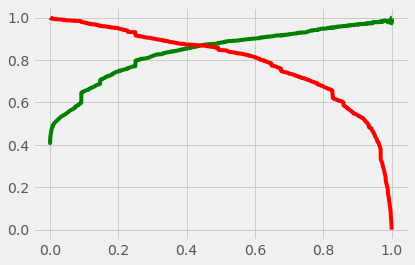

In [600]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 6. Making predictions on the test set

In [601]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit'
       ]] = scaler.fit_transform(X_test[['TotalVisits',
        'Total Time Spent on Website','Page Views Per Visit']])

In [602]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3271     0.143722                    -0.591008              0.716169   
1490     0.391416                     1.894051              1.151248   
7936    -0.351665                    -0.743117             -0.153989   
4216    -0.847051                    -0.878732             -1.024147   
3830     1.134496                    -0.578179              2.456484   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
3271                   1                       0                           0   
1490                   0                       0                           0   
7936                   1                       0                           0   
4216                   0                       0                           0   
3830                   0                       0                           1   

      Lead Source_other_sources  Tags_Busy  Tags_Closed by Horizzon  \
3271                          0          0                        0   
1490                          0          0                        0   
7936                          0          0                        0   
4216                          1          0                        1   
3830                          0          0                        0   

      Tags_Graduation in progress  ...  Tags_switched off  \
3271                            0  ...                  0   
1490                            0  ...                  0   
7936                            0  ...                  0   
4216                            0  ...                  0   
3830                            0  ...                  0   

      Lead Quality_Low in Relevance  Lead Quality_Not Sure  \
3271                              0                      0   
1490                              1                      0   
7936                              0                      0   
4216                              1                      0   
3830                              0                      0   

      Lead Quality_Worst  Asymmetrique Activity Index_02.Medium  \
3271                   0                                      0   
1490                   0                                      1   
7936                   0                                      0   
4216                   0                                      1   
3830                   0                                      0   

      A free copy of Mastering The Interview_Yes  \
3271                                           0   
1490                                           1   
7936                                           0   
4216                                           0   
3830                                           1   

      Last Notable Activity_Modified  Last Notable Activity_SMS Sent  \
3271                               0                               0   
1490                               0                               0   
7936                               0                               0   
4216                               1                               0   
3830                               0                               0   

      Last Notable Activity_other_activities  Asymmetrique_Score_Low_Score  
3271                                       0                             0  
1490                                       0                             0  
7936                                       0                             0  
4216                                       0                             0  
3830                                       0                             0  

[5 rows x 26 columns]

In [603]:
X_test_sm = sm.add_constant(X_test)

In [604]:
y_test_pred = res.predict(X_test_sm)

In [605]:
y_test_pred

3271    0.172608
1490    0.992372
7936    0.166640
4216    0.999889
3830    0.123212
          ...   
850     0.393604
2879    0.048215
6501    0.932153
7155    0.068719
376     0.223569
Length: 2723, dtype: float64

In [606]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [607]:
# Let's see the head
y_pred_1.head()

0
3271  0.172608
1490  0.992372
7936  0.166640
4216  0.999889
3830  0.123212

In [608]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [609]:
# Putting Lead ID to index
y_test_df['Lead_ID'] = y_test_df.index

In [610]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [611]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis = 1)

In [612]:
y_pred_final.head()

Converted  Lead_ID         0
0          0     3271  0.172608
1          1     1490  0.992372
2          0     7936  0.166640
3          1     4216  0.999889
4          0     3830  0.123212

In [613]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns = { 0 : 'Conv_Prob'})

In [614]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Lead_ID  Conv_Prob
0          0     3271   0.172608
1          1     1490   0.992372
2          0     7936   0.166640
3          1     4216   0.999889
4          0     3830   0.123212

In [615]:
y_pred_final['Lead_Score'] = y_pred_final['Conv_Prob'] * 100
y_pred_final.head()

Converted  Lead_ID  Conv_Prob  Lead_Score
0          0     3271   0.172608   17.260781
1          1     1490   0.992372   99.237249
2          0     7936   0.166640   16.664040
3          1     4216   0.999889   99.988911
4          0     3830   0.123212   12.321201

In [616]:
decimals = 1  
y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].apply(lambda x: round(x, decimals))
y_pred_final.head()

Converted  Lead_ID  Conv_Prob  Lead_Score
0          0     3271   0.172608        17.3
1          1     1490   0.992372        99.2
2          0     7936   0.166640        16.7
3          1     4216   0.999889       100.0
4          0     3830   0.123212        12.3

In [617]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

#### 6.1 Model accuracy

In [618]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8909291222915902

In [619]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1597,  137],
       [ 160,  829]], dtype=int64)

In [620]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [621]:
# Let's see the sensitivity of the logistic regression model
TP / float(TP+FN)

0.8382204246713852

In [622]:
# Let us calculate specificity
TN / float(TN+FP)

0.9209919261822376

In [623]:
# Precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8581780538302277

In [624]:
# Recall
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8382204246713852

### 7. Find the lead score.

In [625]:
y_pred_final.sort_values(by = "Lead_Score", ascending = False)

Converted  Lead_ID  Conv_Prob  Lead_Score  final_predicted
869           1     3739   0.999511       100.0                1
2630          1     7136   0.999619       100.0                1
293           1     4149   0.999889       100.0                1
2368          1     4568   0.999811       100.0                1
85            1     2896   0.999910       100.0                1
...         ...      ...        ...         ...              ...
2559          0     4041   0.000050         0.0                0
2560          0     6590   0.000173         0.0                0
2561          0     5305   0.000046         0.0                0
1959          0     4818   0.000305         0.0                0
1258          0     1620   0.000428         0.0                0

[2723 rows x 5 columns]

In [626]:
# Let's store them into 3 baskets:
# 100 - 80 = Top Leads
# 80 - 60 = Medium Leads
# Below 60 = Low leads

In [627]:
#Let's first create a function:

def f1(row):
    if row['Lead_Score'] >= 80.0 :
        result = 'Top Leads'
    elif row['Lead_Score'] < 80.0 and row['Lead_Score'] >= 60.0 :
        result = 'Medium Leads'
    else:
        result = "Low leads"
    return result

# Then apply the function, f1 in the new column:

y_pred_final['Lead_Score_cat'] = y_pred_final.apply(f1, axis = 1)
y_pred_final.head()

Converted  Lead_ID  Conv_Prob  Lead_Score  final_predicted Lead_Score_cat
0          0     3271   0.172608        17.3                0      Low leads
1          1     1490   0.992372        99.2                1      Top Leads
2          0     7936   0.166640        16.7                0      Low leads
3          1     4216   0.999889       100.0                1      Top Leads
4          0     3830   0.123212        12.3                0      Low leads

In [628]:
plt.title("Lead Score \n", size = '16')
plt.xlabel("Total ", size = '14')
y_pred_final['Lead_Score_cat'].value_counts().plot.barh()